# LEGO Bricks ML Vision - Inference Pipeline Demonstration
We will use the lego_cli.py file to demonstrate the inference pipeline. The pipeline will consist of the following steps:

1. **Setup and Environment Configuration**: Ensure the necessary environment is set up, including cloning the repository and verifying CUDA availability.
2. **Image Selection**: Randomly select an image from the available test images.
3. **Inference Execution**: Run the full inference pipeline on the selected image, including brick detection, stud detection, and dimension classification.
4. **Result Visualization**: Display the results, including annotated images and detected dimensions.



## 1. Setup and Environment Configuration



In [1]:
# Check for "LEGO_BRICKS_ML_VISION" folder in the cwd folder branch

import os
import sys
from pathlib import Path
import subprocess
import logging
import rich.logging as rlog

# Set up rich logger with emoji support

logger = logging.getLogger("inference_demo")
if not logger.handlers:
    handler = rlog.RichHandler(markup=True)
    logger.setLevel(logging.INFO)
    logger.addHandler(handler)
    logger.info("🚀 Inference Demo Logger initialized")


def check_repo_clone():
    """
    Check if the cwd name matches the repo name.
    If not, check if the parent folder matches the repo name.
    If not, clone the repo.

    Returns the local repo root path and adds it to the sys.path
    """
    # Set up rich logger
    logger = logging.getLogger("repo_setup")
    handler = rlog.RichHandler(rich_tracebacks=True, markup=True)
    logger.setLevel(logging.INFO)
    if not logger.handlers:
        logger.addHandler(handler)
    
    userGithub = "MiguelDiLalla"
    repoGithub = "LEGO_Bricks_ML_Vision"
    repo_url = f"https://github.com/{userGithub}/{repoGithub}.git"

    cwd = Path.cwd()
    cwd_name = cwd.name
    cwd_parent = cwd.parent

    logger.info(f"Checking for repository: [bold blue]{repoGithub}[/bold blue]")
    
    if cwd_name != repoGithub and cwd_parent.name != repoGithub:
        logger.info(f"Repository not found in current path or parent directory")
        logger.info(f"Cloning from [green]{repo_url}[/green]...")
        
        try:
            subprocess.run(["git", "clone", repo_url], check=True)
            logger.info(f"Repository successfully cloned")
            # Add the repo to the sys.path
            sys.path.append(cwd / repoGithub)
            # Change the cwd to the repo root
            os.chdir(cwd / repoGithub)
            return cwd / repoGithub
        except subprocess.CalledProcessError as e:
            logger.error(f"Failed to clone repository: {e}")
            logger.error(f"Please clone manually with: git clone {repo_url}")
            raise RuntimeError(f"Repository setup failed: {e}")
    else:
        repo_path = cwd if cwd_name == repoGithub else cwd_parent
        logger.info(f"Repository [bold blue]{repoGithub}[/bold blue] already available at [bold green]{repo_path}[/bold green]")
        
        # Add the repo to the sys.path
        sys.path.append(repo_path)
        # Change the cwd to the repo root (and log it)
        logger.info(f"Changing working directory to: [bold green]{repo_path}[/bold green]")
        os.chdir(repo_path)
        return repo_path

repo_clone_path = check_repo_clone()


[03/09/25 14:21:07] INFO     🚀 Inference Demo Logger initialized                                     ]8;id=968093;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py\2617228.py]8;;\:]8;id=399790;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py#17\17]8;;\

[03/09/25 14:21:07] INFO     Checking for repository: LEGO_Bricks_ML_Vision                           ]8;id=107651;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py\2617228.py]8;;\:]8;id=550031;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py#43\43]8;;\

                    INFO     Repository LEGO_Bricks_ML_Vision already available at                    ]8;id=858797;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py\2617228.py]8;;\:]8;id=670208;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py#63\63]8;;\
                             c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision                              

                    INFO     Changing working directory to:                                           ]8;id=818605;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py\2617228.py]8;;\:]8;id=947755;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2617228.py#68\68]8;;\
                             c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision                              

In [2]:

# Verify CUDA availability
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
logger.info(f"Using device: {device}")


[03/09/25 14:21:11] INFO     Using device: cpu                                                      ]8;id=319923;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\4022083905.py\4022083905.py]8;;\:]8;id=520397;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\4022083905.py#4\4]8;;\

In [11]:
from utils.visualization_utils import display_results_table, create_composite_image
from utils.model_utils import run_full_algorithm

ModuleNotFoundError: No module named 'utils.model_utils'


## 2. Run the inference pipeline:


[03/09/25 14:22:10] INFO     Selected image:                                                        ]8;id=439491;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2701309389.py\2701309389.py]8;;\:]8;id=535335;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\2701309389.py#7\7]8;;\
                             c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\presentation\                
                             Test_images\BricksPics\image_668.jpg                                                  

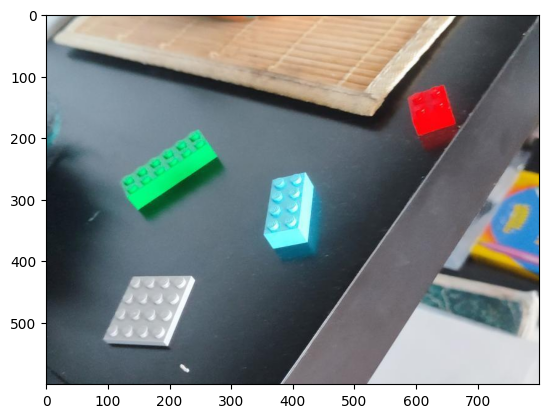

In [9]:
# Choose randomly from the bricks images avaible inside presentation folder (presentation/Test_images/BricksPics)

import random
bricks_images_path = repo_clone_path / "presentation" / "Test_images" / "BricksPics"
bricks_images = list(bricks_images_path.glob("*.jpg"))
bricks_image = random.choice(bricks_images)
logger.info(f"Selected image: {bricks_image}")

# load and display

from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(bricks_image)
plt.imshow(image)

### Run inference Pipeline via cli:

In [10]:
from lego_cli import run_full_algorithm

# Import required function from lego_cli

# Set up output directory for results
output_dir = repo_clone_path / "results" / "demo_inference"
output_dir.mkdir(parents=True, exist_ok=True)

# Run full inference pipeline
logger.info("🔍 Running full inference pipeline...")
result = run_full_algorithm(
    str(bricks_image),  # Convert Path to string
    save_annotated=True,
    output_folder=str(output_dir),
    force_rerun=True
)

# Display results
if result:
    brick_results = result.get("brick_results", {})
    studs_results = result.get("studs_results", [])
    
    num_bricks = len(brick_results.get("boxes", []))
    logger.info(f"🧱 Detected {num_bricks} bricks")
    
    for i, stud_result in enumerate(studs_results):
        dimension = stud_result.get("dimension", "Unknown")
        logger.info(f"📏 Brick {i+1} dimension: {dimension}")
    
    logger.info(f"💾 Results saved to: {output_dir}")
else:
    logger.error("❌ Inference failed")

2025-03-09 14:25:33,485 - INFO - 🚀 Config Utils module loaded.
2025-03-09 14:25:33,486 - INFO - 📌 REPO URL set to: https://api.github.com/repos/MiguelDiLalla/LEGO_Bricks_ML_Vision/contents/
2025-03-09 14:25:33,487 - INFO - 📂 Current working directory: c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision
2025-03-09 14:25:33,490 - INFO - ✅ Found 8 images in presentation/Test_images/BricksPics
2025-03-09 14:25:33,492 - INFO - ✅ Found 20 images in presentation/Test_images/StudsPics
2025-03-09 14:25:33,663 - INFO - ✅ Bricks model loaded.
2025-03-09 14:25:33,740 - INFO - ✅ Studs model loaded.
2025-03-09 14:25:33,742 - INFO - 🖼️ Logo found locally.
2025-03-09 14:25:33,746 - INFO - 🚀 Detection Utils module loaded.
2025-03-09 14:25:33,749 - INFO - 🚀 Metadata Utils module loaded.
2025-03-09 14:25:33,764 - INFO - 🚀 EXIF Utils module loaded.
2025-03-09 14:25:33,768 - INFO - 🚀 Classification Utils module loaded.
2025-03-09 14:25:33,797 - INFO - 🚀 Visualization Utils module loaded.
2025-03-09 14

[03/09/25 14:25:33] INFO     🔍 Running full inference pipeline...                                  ]8;id=50581;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\974416564.py\974416564.py]8;;\:]8;id=503538;file://C:\Users\User\AppData\Local\Temp\ipykernel_2592\974416564.py#10\10]8;;\

2025-03-09 14:25:33,811 - INFO - 🔍 Running full inference pipeline...
2025-03-09 14:25:33,817 - INFO - 🔄 Force rerun requested. Cleaning existing EXIF metadata.
2025-03-09 14:25:33,820 - WARNING - ⚠️ No UserComment tag found in c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\presentation\Test_images\BricksPics\image_668.jpg
2025-03-09 14:25:33,821 - WARNING - ⚠️ No metadata found in the image: c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\presentation\Test_images\BricksPics\image_668.jpg


Output()

0: 480x640 5 bricks, 253.0ms
Speed: 6.0ms preprocess, 253.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


2025-03-09 14:25:37,181 - INFO - 🆕 Using numpy array source.


NameError: name 'display_results_table' is not defined